In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


**Select Stock and Time Period**

In [4]:
ticker = "AAPL"
period = "1mo"

**Fetch Live Stock Data**

In [5]:
stock = yf.Ticker(ticker)
data = stock.history(period=period)

**Preview the Data**

In [8]:
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-12-17 00:00:00-05:00,275.010010,276.160004,271.640015,271.839996,50138700,0.0,0.0
2025-12-18 00:00:00-05:00,273.609985,273.630005,266.950012,272.190002,51630700,0.0,0.0
2025-12-19 00:00:00-05:00,272.149994,274.600006,269.899994,273.670013,144632000,0.0,0.0
2025-12-22 00:00:00-05:00,272.859985,273.880005,270.510010,270.970001,36571800,0.0,0.0
2025-12-23 00:00:00-05:00,270.839996,272.500000,269.559998,272.359985,29642000,0.0,0.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2025-12-17 00:00:00-05:00 to 2026-01-16 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          21 non-null     float64
 1   High          21 non-null     float64
 2   Low           21 non-null     float64
 3   Close         21 non-null     float64
 4   Volume        21 non-null     int64  
 5   Dividends     21 non-null     float64
 6   Stock Splits  21 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.3 KB


**Data Cleaning**

In [11]:
data = data.reset_index()
data = data[['Date', 'Close', 'Volume']]
data

,Date,Close,Volume
0,2025-12-17 00:00:00-05:00,271.839996,50138700
1,2025-12-18 00:00:00-05:00,272.190002,51630700
2,2025-12-19 00:00:00-05:00,273.670013,144632000
3,2025-12-22 00:00:00-05:00,270.970001,36571800
4,2025-12-23 00:00:00-05:00,272.359985,29642000
5,2025-12-24 00:00:00-05:00,273.809998,17910600
6,2025-12-26 00:00:00-05:00,273.399994,21521800
7,2025-12-29 00:00:00-05:00,273.760010,23715200
8,2025-12-30 00:00:00-05:00,273.079987,22139600
9,2025-12-31 00:00:00-05:00,271.859985,27293600


In [12]:
data.isnull().sum()

,0
Date,0
Close,0
Volume,0


**Basic Trend Analysis**

In [13]:
latest_price = data['Close'].iloc[-1]
highest_price = data['Close'].max()
lowest_price = data['Close'].min()

print("Latest Closing Price:", latest_price)
print("Highest Price:", highest_price)
print("Lowest Price:", lowest_price)


Latest Closing Price: 255.52999877929688
Highest Price: 273.80999755859375
Lowest Price: 255.52999877929688


**Daily and Percentage Chnage**

In [14]:
data['Daily Change'] = data['Close'].diff()
data['Percent Change'] = data['Close'].pct_change()* 100
data.head()

,Date,Close,Volume,Daily Change,Percent Change
0,2025-12-17 00:00:00-05:00,271.839996,50138700,NaN,NaN
1,2025-12-18 00:00:00-05:00,272.190002,51630700,0.350006,0.128754
2,2025-12-19 00:00:00-05:00,273.670013,144632000,1.480011,0.543742
3,2025-12-22 00:00:00-05:00,270.970001,36571800,-2.700012,-0.986594
4,2025-12-23 00:00:00-05:00,272.359985,29642000,1.389984,0.512966


**Moving Average**

In [16]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data

,Date,Close,Volume,Daily Change,Percent Change,SMA_20
0,2025-12-17 00:00:00-05:00,271.839996,50138700,NaN,NaN,NaN
1,2025-12-18 00:00:00-05:00,272.190002,51630700,0.350006,0.128754,NaN
2,2025-12-19 00:00:00-05:00,273.670013,144632000,1.480011,0.543742,NaN
3,2025-12-22 00:00:00-05:00,270.970001,36571800,-2.700012,-0.986594,NaN
4,2025-12-23 00:00:00-05:00,272.359985,29642000,1.389984,0.512966,NaN
5,2025-12-24 00:00:00-05:00,273.809998,17910600,1.450012,0.532388,NaN
6,2025-12-26 00:00:00-05:00,273.399994,21521800,-0.410004,-0.149740,NaN
7,2025-12-29 00:00:00-05:00,273.760010,23715200,0.360016,0.131681,NaN
8,2025-12-30 00:00:00-05:00,273.079987,22139600,-0.680023,-0.248401,NaN
9,2025-12-31 00:00:00-05:00,271.859985,27293600,-1.220001,-0.446756,NaN


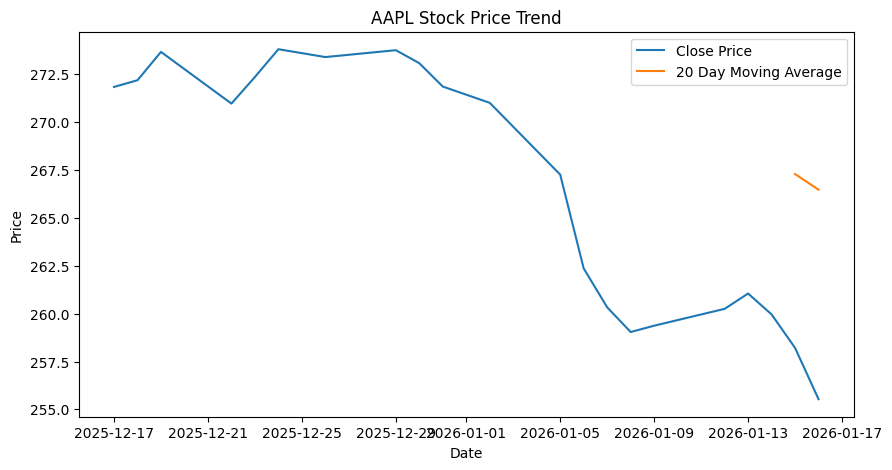

In [17]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_20'], label='20 Day Moving Average')
plt.title(f"{ticker} Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


**Trading Volume**

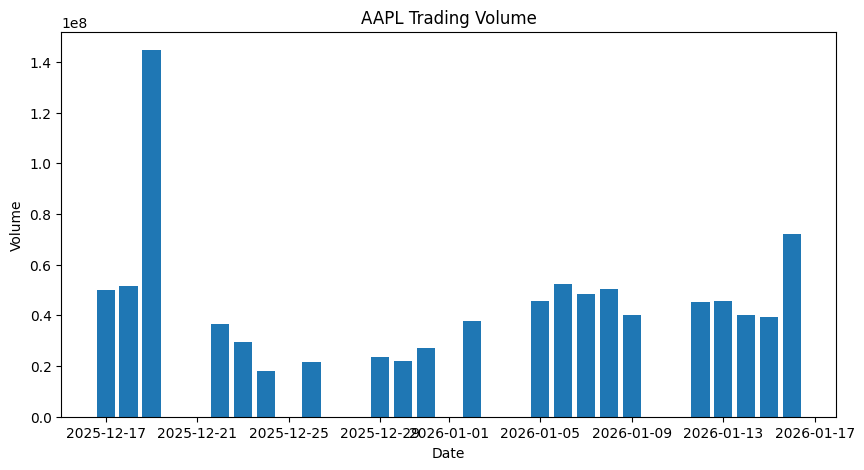

In [33]:
plt.figure(figsize=(10,5))
plt.bar(data['Date'], data['Volume'])
plt.title(f"{ticker} Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


**Some info**

In [19]:
if latest_price > data['Close'].mean():
    print("The stock is trading above its average price → bullish trend.")
else:
    print("The stock is trading below its average price → bearish trend.")


The stock is trading below its average price → bearish trend.


In [20]:
data.tail()

,Date,Close,Volume,Daily Change,Percent Change,SMA_20
16,2026-01-12 00:00:00-05:00,260.250000,45263800,0.880005,0.339286,NaN
17,2026-01-13 00:00:00-05:00,261.049988,45730800,0.799988,0.307392,NaN
18,2026-01-14 00:00:00-05:00,259.959991,40019400,-1.089996,-0.417543,NaN
19,2026-01-15 00:00:00-05:00,258.209991,39388600,-1.750000,-0.673181,267.288997
20,2026-01-16 00:00:00-05:00,255.529999,72018600,-2.679993,-1.037912,266.473497


**Daily Returns**

In [23]:
data['Daily Return (%)'] = data['Close'].pct_change() * 100


**Cumulative Returns**

In [24]:
data['Cumulative Return (%)'] = (1 + data['Daily Return (%)']/100).cumprod() * 100


In [25]:
data

,Date,Close,Volume,Daily Change,Percent Change,SMA_20,SMA_20_filled,SMA_20_ffill,Daily Return (%),Cumulative Return (%)
0,2025-12-17 00:00:00-05:00,271.839996,50138700,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,2025-12-18 00:00:00-05:00,272.190002,51630700,0.350006,0.128754,NaN,0.000000,NaN,0.128754,100.128754
2,2025-12-19 00:00:00-05:00,273.670013,144632000,1.480011,0.543742,NaN,0.000000,NaN,0.543742,100.673196
3,2025-12-22 00:00:00-05:00,270.970001,36571800,-2.700012,-0.986594,NaN,0.000000,NaN,-0.986594,99.679961
4,2025-12-23 00:00:00-05:00,272.359985,29642000,1.389984,0.512966,NaN,0.000000,NaN,0.512966,100.191285
5,2025-12-24 00:00:00-05:00,273.809998,17910600,1.450012,0.532388,NaN,0.000000,NaN,0.532388,100.724691
6,2025-12-26 00:00:00-05:00,273.399994,21521800,-0.410004,-0.149740,NaN,0.000000,NaN,-0.149740,100.573866
7,2025-12-29 00:00:00-05:00,273.760010,23715200,0.360016,0.131681,NaN,0.000000,NaN,0.131681,100.706303
8,2025-12-30 00:00:00-05:00,273.079987,22139600,-0.680023,-0.248401,NaN,0.000000,NaN,-0.248401,100.456147
9,2025-12-31 00:00:00-05:00,271.859985,27293600,-1.220001,-0.446756,NaN,0.000000,NaN,-0.446756,100.007353


**Visualizing**: “How much an investor’s money grew over time.”

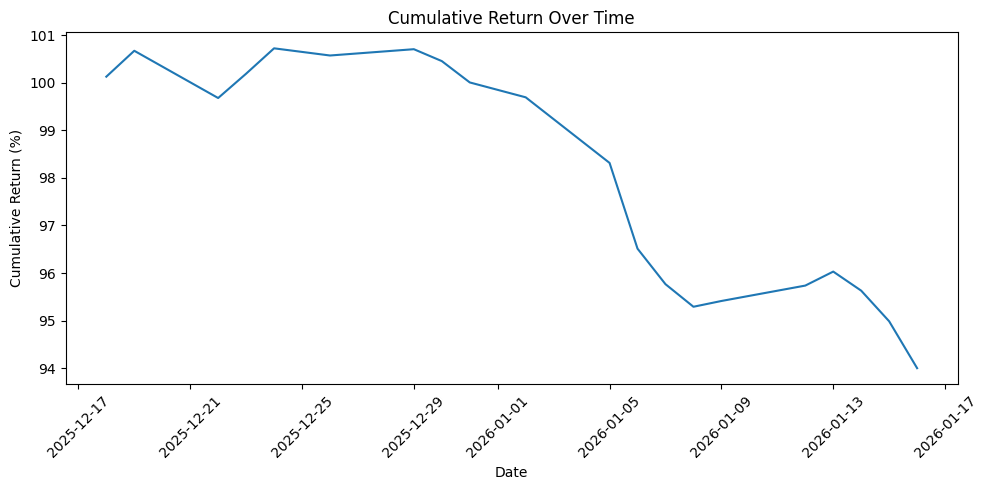

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Cumulative Return (%)'])
plt.title("Cumulative Return Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Rolling Volatility**

In [27]:
data['Volatility (7D)'] = data['Daily Return (%)'].rolling(window=7).std()


In [28]:
data[['Date', 'Volatility (7D)']].head(10)


,Date,Volatility (7D)
0,2025-12-17 00:00:00-05:00,NaN
1,2025-12-18 00:00:00-05:00,NaN
2,2025-12-19 00:00:00-05:00,NaN
3,2025-12-22 00:00:00-05:00,NaN
4,2025-12-23 00:00:00-05:00,NaN
5,2025-12-24 00:00:00-05:00,NaN
6,2025-12-26 00:00:00-05:00,NaN
7,2025-12-29 00:00:00-05:00,0.547611
8,2025-12-30 00:00:00-05:00,0.562869
9,2025-12-31 00:00:00-05:00,0.541573


**Plot Volatility Trend**

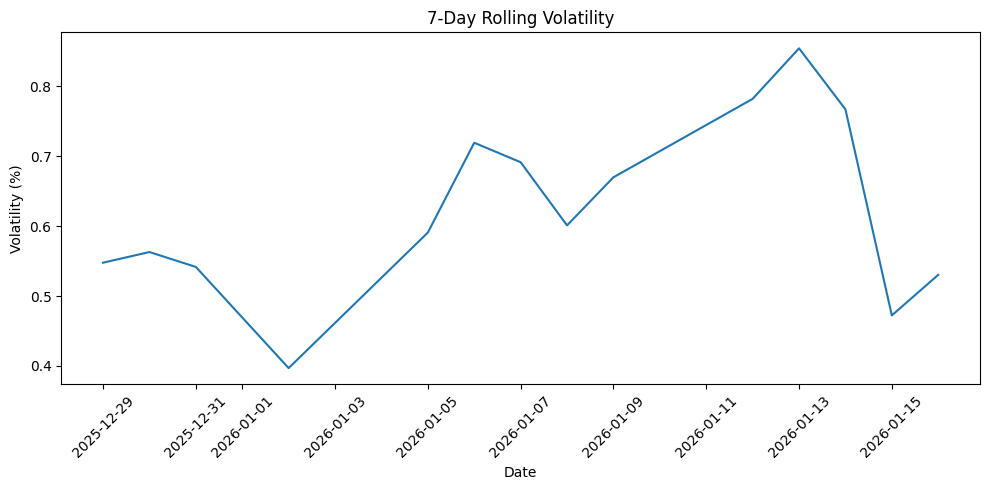

In [30]:
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Volatility (7D)'])
plt.title("7-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
